# Bayes Learning Demonstration 2
### Extract the probabilities of three possible outcomes from data using Bayes' Theorem
####  James B. Cole (James.Cole.ctr@afit.edu or james.b.cole.3142@gmail.com), Version 21 May 2018. 
 

In [1]:
import math as m
import numpy as np
import random
import matplotlib.pyplot as plt


#### set true values of  $p_A$, $p_B$, and $p_C = 1 - p_A - p_C $

In [2]:
pA0 = 0.45              # probability of A
pB0 = 0.35              # probability of B
pC0 = 1.0 - pA0 - pB0   # probability of C

#### Three possible outcomes of a trial: A with probability $p_A$, B with probability $p_B$,  C with probability $p_C$.

Data $D = (A,B,C) $, number of times $A$, $B$, $C$, respectively occur in a trial set. 

#### Given the data we extract $p_A$ and  $p_B$ using Bayes' theorem.  

### Multinomial Distribution
Probability of $D$ given $p_A$ and $p_B$:

\begin{equation*}
      P( D \, | \, p_A, p_B) = \frac{(A + B + C)! }{A!B!C!} p_A^A \,\, p_B^B \, (1 - p_A - p_B)^C,  
      \hspace{3.0cm} (1) 
\end{equation*}
where $0 \le p_A + p_B \le 1 $. 

In [3]:
# Implementation of (1)
#
# p_a = probability that A occurs, p_b = probability that B occurs, p_c = probability that C occurs
# occurences of A, b of B, c of C
#
def probABC(p_a,p_b,a,b,c):
    return ( p_a**a * p_b**b * (1.0 - p_a - p_b)**c ) * m.factorial(a+b+c) / (m.factorial(a)*m.factorial(b)*m.factorial(c))
#
# if $(a+b+c)$ is much larger than 100 implement this function using Stirling's approximation. 

### Application of Bayes' Theorem
Let $\rho_{0,A}$ and Let $\rho_{0,B}$ be the probability distributions of $p_A$ and $p_B$ respectively, before any data is collected. According to Bayes' theorem, the probability distribution of $p_A$ and $p_B$ after collecting the data is

#### General posterior distribution
\begin{equation*}
\rho_1(p_A, p_B \, | \, D) = \frac{ P( D \, | \, p_A, p_B) \, \rho_{0,A}(p_A) \, \rho_{0,B}(p_B)}{ 
\int_0^1 { dp_A \, \rho_{0,A}(p_A) \int_0^{1 - p_A} { dp_B \, \rho_{0,B}(p_B) \, P( D \, | \, p_A, p_B) } } 
}, \hspace{2.1cm}(2) 
\end{equation*}
where $0 \le p_A + p_B \le 1 $. 

#### First posterior distributions (assuming uniform prior)*
Assuming no prior information, we take the prior distributions to be flat: $\rho_{0A}(p_A) = \rho_(p_B)= 1 $ for for $0 \le p_A, p_B \le 1 $. Thus (2) becomes 

\begin{equation*}
\rho_1(p_A, p_B \, | \, D) = \frac{ p_A^A \, p_B^B   \, (1 - p_A - p_B)^C  }{ 
\int_0^1 { dp_A \, p_A^A \int_0^{1 - p_A} { dp_B \, p_B^B \, (1 - p_A - p_B)^C } } }. \hspace{3.5cm} (3) 
\end{equation*}

Using

\begin{equation*}
\int_0^a { dt \, t^n \, (a-t)^m  } = a^{n +m+1} \frac{ n! m! } {(n+m+1)! }, 
\end{equation*}

where $m$ and $n$ are integers $\ge 0$, the denominator of (3) becomes

\begin{align}
\int_0^1 { dp_A \, p_A^A \int_0^{1 - p_A} { dp_B \, p_B^B \, (1 - p_A - p_B)^C } }  
& = 
\frac{ B!C! }{(B+C+1)! } \int_0^1 { dp_A \, p_A^A \, (1-p_A)^{B+C+1} }  \\
& =
\frac{ A! B! C! }{ (A + B + C +2)! }.
\end{align} 

**First posterior distribution** of $p_A$, and $p_B$ is
\begin{align}
\rho_1(p_A, p_B \, | \, D) & = \frac { (A + B + C +2)! }{ A!B!C! } p_A^A \, p_B^B \, (1 - p_A - p_B)^C  \, \, \, \,  \rm{if} \, \, \,  0 \le p_A + p_B \le 1 
\hspace{0.5 cm} (4) \\
                           & = 0 \hspace{7.75 cm} \rm{otherwise}.
\end{align}

*Another valid prior is $p_A = p_B = p_C = 1/3$, see discussion in J.K. Ghosh, M. Delampady, T. Samanta, "An Introduction to Bayesian Analysis, Springer, 2006. (Sect. 2.2, p.33). 

In [4]:
#### first posterior distribution (after one set of flips) for flat prior (eqn. 4 above) ####
#
def rho1(pA, pB, a,b,c):
    if 0.0 <= pA + pB <= 1.0:
        return ( pA**a * pB**b *(1.0 - pA - pB)**c ) * m.factorial(a + b + c +2) / (m.factorial(a) * m.factorial(b)* m.factorial(c))
    elif pA + pB > 1.0 :
        return 0.0

# if $(a+b+c)$ is much larger than 100, implement this function using Stirling's approximation.      

Define a Trial Set (set of nt trials). Output is [A,B,C]. 
Make the associations: occurence of $A \rightarrow +1 $, $B \rightarrow -1 $, $C \rightarrow 0 $.

In [5]:
# probability of A (= +1) = pA0; probability of B (= -1) = pB0; probability of C (= 0) = pC0 = 1- p0A - p0B. 
#
# list of weights (probilities) for random choice function
#
list_of_weights = [pA0,pB0,pC0]  
list_of_choices = [1,-1,0]
#
# Define a TrialSet (nt trials) 
def TrialSet(nt):
    D = [] # intilalize data list
    D = random.choices(list_of_choices, weights = list_of_weights, k = nt)
    S1 = sum(D)          # nA - nB 
    D2 = [D[i]**2 for i in range(0,nt)]
    S2 = sum(D2)         # nA + nB
    nA = (S1 + S2)/2     # number of A occurences
    nB = (S2 - S1)/2     # number of A occurences
    nC = nt - S2 
    result = [nA,nB,nC]
    return result

***auxilliary function***

In [6]:
# multiply two lists element by element; output the rsult as an array
#
def MultLists(X,Y):
    AX = np.array(X)
    AY = np.array(Y)
    return AX*AY

Define disretized probability distributions. **Nd** equally spaced probabilities $0 \le p \le 1$. 

**Note:** the discretization limits the accuracy of the Bayesian estimates. 

In [7]:
# Set Number of discrete probability values
Nd = 100
#
# probability interval
delta_p = 1.0 / float(Nd)  

In [8]:
# Nd X Nd square mesh array of equally spaced probability values from 0.5* delta_p  to 1 - 0.5* delta_p   
#
pAval = np.arange(0.5*delta_p,1.0,delta_p)
pBval = np.arange(0.5*delta_p,1.0,delta_p)
#

Set number of trials (**NT**) in all Trial Sets) 

In [9]:
NT = 32

#### Trial Set 1
Run the first Trial Set first posterior distribution computed data from N_T trials using eqn. 4.

probabilty of A = 0.45 , its estimate =  0.594  probabilty of B = 0.35 , its estimate =  0.281
Check normalization: integral of posterior = 1.0
TrialSet = 1 , peak_location = (pA,pB) = ( 0.59 , 0.28 )


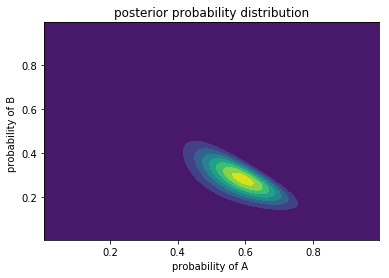

In [10]:
# trial 1
Result1 = TrialSet(NT)
A = Result1[0]
B = Result1[1]
C = Result1[2]
#
# discretized posterior probability distribution from flat prior (no need to give since it is 1.0)
posterior = [ [ rho1(pAval[iA],pBval[iB],A,B,C) for iA in range(0,Nd) ] for iB in range(0,Nd) ]
#
#Check normalization of the posterior probability distribution
normalization = np.sum(posterior)*delta_p**2
normalization = round(normalization,4)           # round off
#
posterior_max = np.max(posterior)
maxlocation = np.argwhere(posterior == posterior_max)
maxlocation = np.array([ maxlocation[0][1], maxlocation[0][0] ])
maxlocation = maxlocation*delta_p
maxlocation = np.round(maxlocation,4)
#
# start running total of A amd B occurences over all trial sets
NumA = A
NumB = B
NumC = C
NumABC = float(NumA + NumB + NumC)
#
# estimate of probability of A is A/(A+B+C), of B is B/(A+B+C)
estA = round( float(NumA) / NumABC, 3)
estB = round( float(NumB) / NumABC, 3)
#
# start list of errors / running total of trials
# 
errA = [estA - pA0]  # error of the estimate of pA0
errB = [estB - pB0]  # error of the estimate of pB0
#
trials = [NT]        # running list of total number of trials

print("probabilty of A =", pA0, ", its estimate = ", estA, " probabilty of B =", pB0, ", its estimate = ", estB )
print("Check normalization: integral of posterior =", normalization)
print("TrialSet =", 1, ", peak_location = (pA,pB) =", "(",maxlocation[0], "," , maxlocation[1], ")")
#
plt.xlabel('probability of A ')
plt.ylabel('probability of B ')
plt.title('posterior probability distribution')
plt.contourf(pAval,pBval,posterior)
#

Above plot shows the posterior distribution after Trial Set 1 (flat prior).

#### Intialize and then run **NTrials** Trial Sets

probabilty of A = 0.45 , its estimate = 0.5469  probabilty of B = 0.35 , its estimate = 0.2969
Check normalization: integral of posterior =  1.0
TrialSet = 2 , peak_location = (pA,pB) = ( 0.54 , 0.29 )


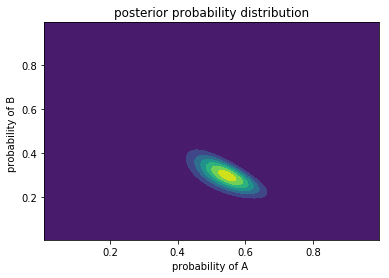

probabilty of A = 0.45 , its estimate = 0.5104  probabilty of B = 0.35 , its estimate = 0.3646
Check normalization: integral of posterior =  1.0
TrialSet = 3 , peak_location = (pA,pB) = ( 0.51 , 0.36 )


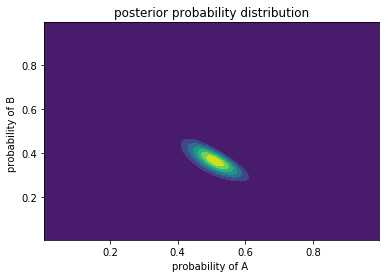

probabilty of A = 0.45 , its estimate = 0.5078  probabilty of B = 0.35 , its estimate = 0.3438
Check normalization: integral of posterior =  1.0
TrialSet = 4 , peak_location = (pA,pB) = ( 0.5 , 0.34 )


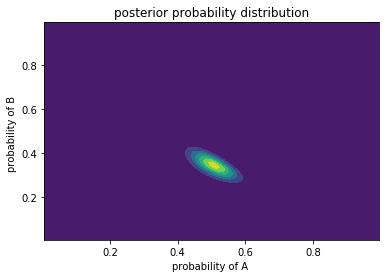

probabilty of A = 0.45 , its estimate = 0.5125  probabilty of B = 0.35 , its estimate = 0.35
Check normalization: integral of posterior =  1.0
TrialSet = 5 , peak_location = (pA,pB) = ( 0.51 , 0.34 )


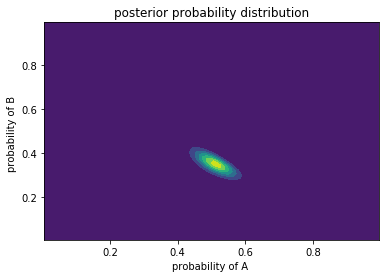

probabilty of A = 0.45 , its estimate = 0.4896  probabilty of B = 0.35 , its estimate = 0.349
Check normalization: integral of posterior =  1.0
TrialSet = 6 , peak_location = (pA,pB) = ( 0.49 , 0.34 )


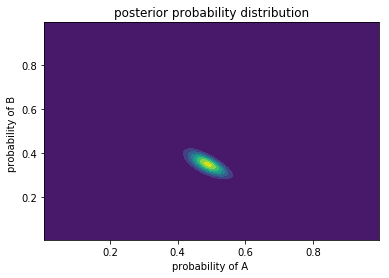

probabilty of A = 0.45 , its estimate = 0.4598  probabilty of B = 0.35 , its estimate = 0.3661
Check normalization: integral of posterior =  1.0
TrialSet = 7 , peak_location = (pA,pB) = ( 0.46 , 0.36 )


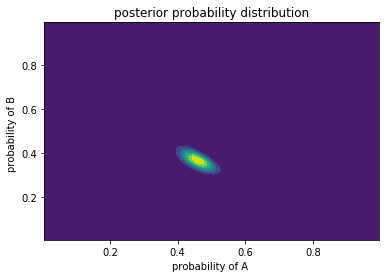

probabilty of A = 0.45 , its estimate = 0.4453  probabilty of B = 0.35 , its estimate = 0.3867
Check normalization: integral of posterior =  1.0
TrialSet = 8 , peak_location = (pA,pB) = ( 0.44 , 0.38 )


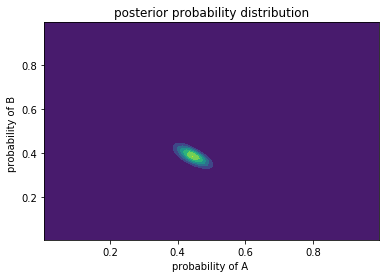

probabilty of A = 0.45 , its estimate = 0.4514  probabilty of B = 0.35 , its estimate = 0.3819
Check normalization: integral of posterior =  1.0
TrialSet = 9 , peak_location = (pA,pB) = ( 0.44 , 0.38 )


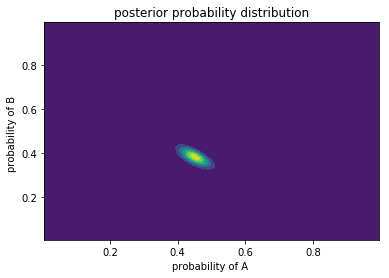

probabilty of A = 0.45 , its estimate = 0.45  probabilty of B = 0.35 , its estimate = 0.375
Check normalization: integral of posterior =  1.0
TrialSet = 10 , peak_location = (pA,pB) = ( 0.44 , 0.37 )


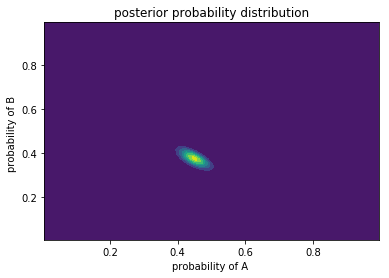

probabilty of A = 0.45 , its estimate = 0.4517  probabilty of B = 0.35 , its estimate = 0.3693
Check normalization: integral of posterior =  1.0
TrialSet = 11 , peak_location = (pA,pB) = ( 0.45 , 0.36 )


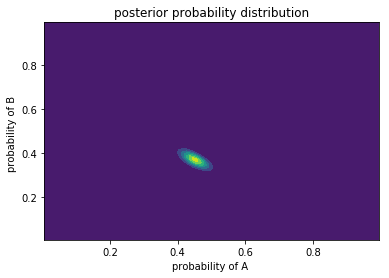

probabilty of A = 0.45 , its estimate = 0.4583  probabilty of B = 0.35 , its estimate = 0.362
Check normalization: integral of posterior =  1.0
TrialSet = 12 , peak_location = (pA,pB) = ( 0.45 , 0.36 )


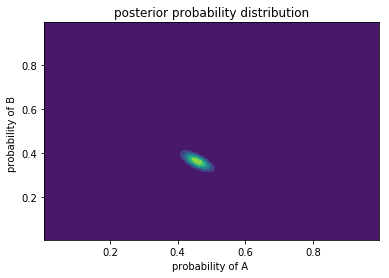

In [11]:
### Initialization of Loop ###
#
# set number of TrialSet iterations
Ntrials = 12 
itrial = 2
#
# posterior of Trial_Set_1 becomes prior for Trial_Set at the beginning of loop 
#
# start iteration
#
while itrial <= Ntrials:
#
# number of A, B, C occurences in this trial
    Result = TrialSet(NT)
    A = Result[0]
    B = Result[1]
    C = Result[2]
# running total 
    NumA = NumA + A
    NumB = NumB + B
    NumC = NumC + C
    NumABC = float(NumA + NumB + NumC)
#
# estimate probability of A and of B 
    estA = round( float(NumA) / NumABC, 4)
    estB = round( float(NumB) / NumABC, 4)
#
# append error of the estimates to list
    errA.append(estA - pA0)  
    errB.append(estB - pB0)
#  
#### compute posterior distribution (output is a two-dimensional list) ####
#### numerical computation of eqn. (4) ####
#
# probability of Data = (A,B,C) for each possible value of (pA and pB) - in a 2-D list
    LprobABC = [ [ probABC(pAval[iA],pBval[iB],A,B,C) for iA in range(0,Nd) ] for iB in range(0,Nd) ]  
#
# multiply L_probABC (element by element) with the prior (posterior from previous iteration) 
    numerator = MultLists(LprobABC,posterior)
#
    denominator = np.sum(numerator) * delta_p**2
#
# update posterior
    posterior = numerator / denominator
#
    normalization = np.sum(posterior)* (delta_p**2)
    normalization = round(normalization,4)        # round off    
#
#
    posterior_max = np.max(posterior)
    maxlocation = np.argwhere(posterior == posterior_max)
    maxlocation = np.array([ maxlocation[0][1], maxlocation[0][0] ])
    maxlocation = maxlocation*delta_p
    maxlocation = np.round(maxlocation,4)
#
    last = len(trials) - 1
    trials.append(trials[last] + NT)     # update list of number of trials     
#
    print("probabilty of A =", pA0, ", its estimate =", estA, " probabilty of B =", pB0, ", its estimate =", estB )
    print("Check normalization: integral of posterior = ", normalization)
    print("TrialSet =", itrial, ", peak_location = (pA,pB) =", "(",maxlocation[0], "," , maxlocation[1], ")")
#   
    plt.xlabel('probability of A ')
    plt.ylabel('probability of B ')
    plt.title('posterior probability distribution')
    plt.contourf(pAval,pBval,posterior)
#
    plt.show() # to see plot after each TrialSet incluse this; omit to see only last plot. 
#
    itrial = itrial + 1

total number of trials = 384


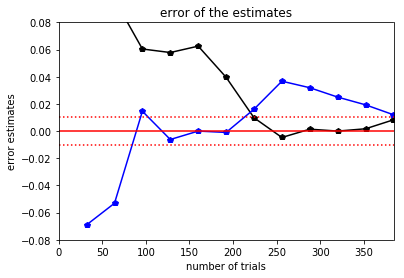

resolution of probability estimates (red band), resolution =  0.01


In [12]:
total_trials = trials[len(trials)-1]
print ("total number of trials =", total_trials )
#
plt.plot(trials, errA, color = "k", marker = "p", linestyle = "-")
plt.plot(trials, errB, color = "b", marker = "p", linestyle = "-")
#
# show resolution limits
plt.axhline(y= delta_p, color = "r", linestyle = ":")
plt.axhline(y= 0.0, color = "r", linestyle = "-")
plt.axhline(y= -delta_p, color = "r", linestyle = ":")
#
plt.xlabel('number of trials')
plt.ylabel('error estimates')
#
plt.xlim(0,total_trials)
plt.ylim(-8.0*delta_p,8.0*delta_p)
plt.title("error of the estimates")
#
plt.show()
#
print("resolution of probability estimates (red band), resolution = ", round(delta_p,4) )